<a href="https://colab.research.google.com/github/melisamichuki01/moringa_project/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2020_05_Melisa_Michuki_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis testing 

---



---



##Defining the question

### The analytical question

---
> 


> During our analysis,we will try to investigate a claim about the blue cars from the provided Autolib dataset that the blue cars are pre taken more on weekdays than on weekends


### Defining the metric for success

As we try to prove whether our hypothesis is true or false,we will carry out the following procedures:

> a) We will carry out univariate analysis where will plot pie charts and bar graphs to understand the data more.

>  b)We will also plot scatter plots and histograms to understand the relationship between variables during bivariate analysis.

> c) We will perform tests that will help us confirm our hypothesis.

### Understanding the context

>Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on July 31st 2018. It was operated by the Bolloré industrial group. The Autolib' scheme maintained a fleet of all-electric Bolloré Bluecars for public use on a paid subscription basis, employing a citywide network of parking and charging stations.As of 3 July 2016, 3,980 Bluecars had been registered for the service, and the scheme had more than 126,900 registered subscribers; Autolib' furthermore offered 1,084 electric car stations in Paris agglomeration with 5,935 charging points.
Since beginning operations in Paris, Autolib' expanded its business to the cities of Lyon and Bordeaux. Bolloré also signed deals to begin operating offshoots of Autolib' in London and Indianapolis in 2015, Turin in 2016 and Singapore in 2017


### Data relevance.

>The data provided is relevant to this study.It is suitable to carry out analysis and give the output needed


In [0]:
#import the libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import warnings
from scipy import stats
%matplotlib inline


In [85]:
df = pd.read_excel('/content/columns_explanation.xlsx')
df.head()

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend


In [86]:
Adf = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
Adf.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Checking the data


---

In [87]:
# Checking the no of records in the dataset available
#
Adf.shape

(16085, 13)

In [88]:
# Previewing the top of our dataset
#
Adf.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [89]:
# Previewing the bottom of our dataset
#
Adf.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [90]:
# Checking the data type for each column
#
Adf.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the data

---

In [91]:
# Checking for null values
#
Adf.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [92]:
# Check for duplicates
#
Adf.duplicated().any()

False

We can see that there are no duplicates or null values therefore we proceed to checking for anomalies,outliers and renaming/dropping collumns

In [93]:
Adf.columns = Adf.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
Adf.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [94]:
Adf = Adf.rename(columns={'dayofweek':'day_of_week'})
Adf.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


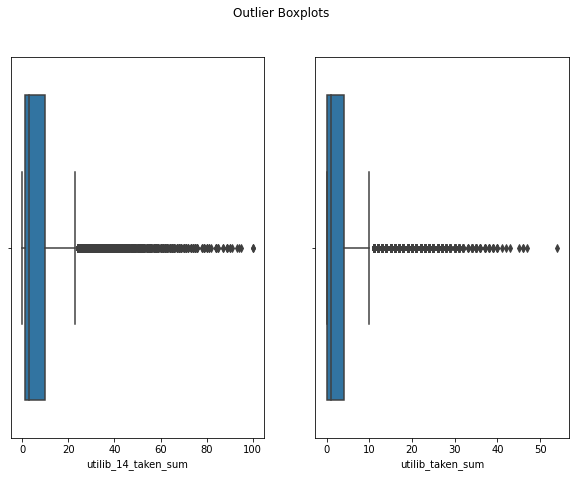

In [95]:
# Check for outliers

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Outlier Boxplots')
sns.boxplot(Adf['utilib_14_taken_sum'], ax=ax1)
sns.boxplot(Adf['utilib_taken_sum'], ax=ax2)
plt.show()

In [96]:
# Checking for anomalies

q1 = Adf.quantile(.25)
q3 =Adf.quantile(.75)

iqr=q3-q1
print(iqr)

postal_code               2070.0
n_daily_data_points          1.0
day_of_week                  4.0
bluecars_taken_sum         115.0
bluecars_returned_sum      115.0
utilib_taken_sum             4.0
utilib_returned_sum          4.0
utilib_14_taken_sum          9.0
utilib_14_returned_sum       9.0
slots_freed_sum              5.0
slots_taken_sum              5.0
dtype: float64


In [97]:
print((Adf < (q1-1.5 * iqr)) | ( Adf > q3 + 1.5 * iqr))

       bluecars_returned_sum  ...  utilib_taken_sum
0                      False  ...             False
1                      False  ...             False
2                      False  ...             False
3                      False  ...             False
4                      False  ...             False
...                      ...  ...               ...
16080                  False  ...             False
16081                  False  ...             False
16082                  False  ...             False
16083                  False  ...             False
16084                  False  ...             False

[16085 rows x 13 columns]


In [98]:
Adf.shape

(16085, 13)

In [99]:
# Deleting the Outliers
Adf1= Adf[~((Adf < (q1 - 1.5 * iqr)) |(Adf > (q3 + 1.5 * iqr))).any(axis=1)]
print(Adf1.shape)

(9783, 13)


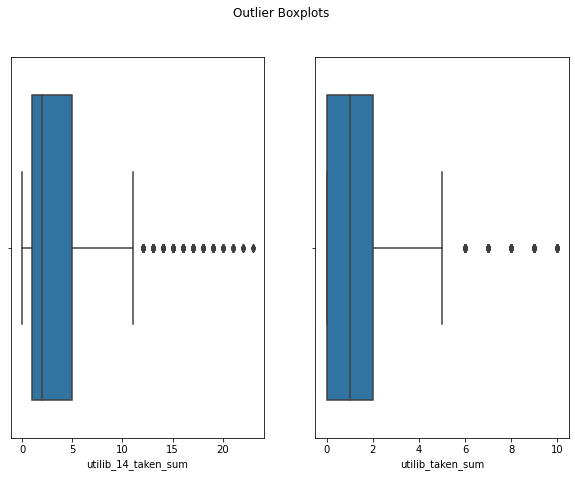

In [100]:
# Check for outliers
#
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Outlier Boxplots')
sns.boxplot(Adf1['utilib_14_taken_sum'], ax=ax1)
sns.boxplot(Adf1['utilib_taken_sum'], ax=ax2)
plt.show()

# Exploratory Data Analysis

## Univariate analysis

### Central tendancies

In [101]:
# Summary of the columns with integer datatype provided in the dataset available
# with the measures of central tendency
Adf1.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,1439.698457,2.979454,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981
std,1012.235885,0.564981,2.074932,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739
min,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,1.000000,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93110.000000,1440.000000,3.000000,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,94100.000000,1440.000000,5.000000,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000,10.000000,10.000000,23.000000,23.000000,12.000000,12.000000


### Bar charts

Text(0, 0.5, 'bluecars_taken_sum')

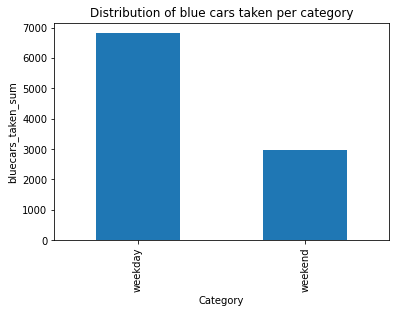

In [102]:
Adf1.groupby(['day_type'])['bluecars_taken_sum'].count().plot.bar()


plt.title('Distribution of blue cars taken per category')

plt.xlabel('Category')
plt.ylabel('bluecars_taken_sum')

Text(0, 0.5, 'bluecars_taken_sum')

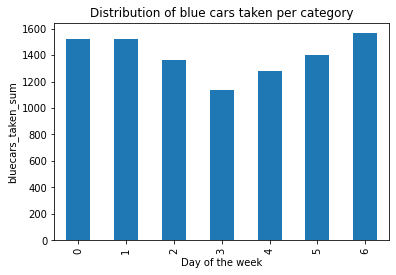

In [103]:
Adf1.groupby(['day_of_week'])['bluecars_taken_sum'].count().plot.bar()


plt.title('Distribution of blue cars taken per category')

plt.xlabel('Day of the week')
plt.ylabel('bluecars_taken_sum')

Text(0, 0.5, 'utilib_taken_sum')

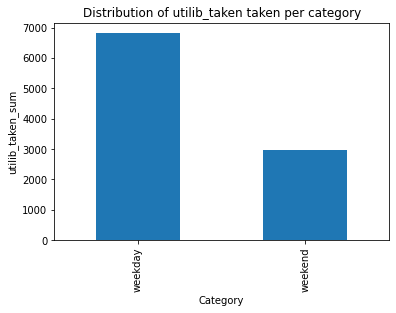

In [104]:
Adf1.groupby(['day_type'])['utilib_taken_sum'].count().plot.bar()


plt.title('Distribution of utilib_taken taken per category')

plt.xlabel('Category')
plt.ylabel('utilib_taken_sum')

Text(0, 0.5, 'utilib_taken_sum')

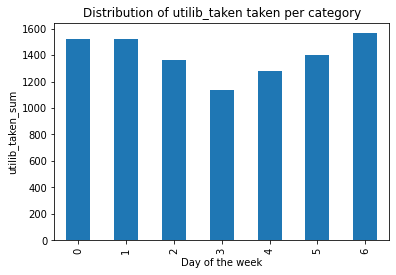

In [105]:
Adf1.groupby(['day_of_week'])['utilib_taken_sum'].count().plot.bar()


plt.title('Distribution of utilib_taken taken per category')

plt.xlabel('Day of the week')
plt.ylabel('utilib_taken_sum')

Text(0, 0.5, 'utilib_14_taken_sum')

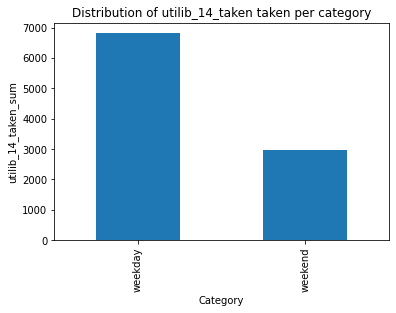

In [106]:
Adf1.groupby(['day_type'])['utilib_14_taken_sum'].count().plot.bar()


plt.title('Distribution of utilib_14_taken taken per category')

plt.xlabel('Category')
plt.ylabel('utilib_14_taken_sum')

Text(0, 0.5, 'utilib_14_taken_sum')

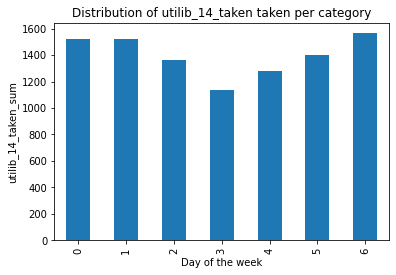

In [107]:
Adf1.groupby(['day_of_week'])['utilib_14_taken_sum'].count().plot.bar()


plt.title('Distribution of utilib_14_taken taken per category')

plt.xlabel('Day of the week')
plt.ylabel('utilib_14_taken_sum')

### Pie charts

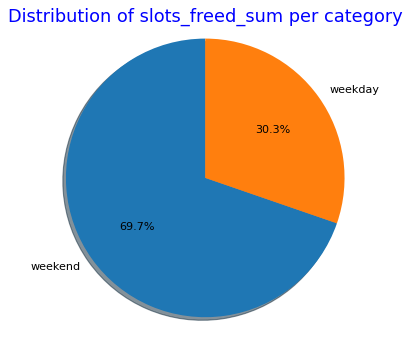

In [108]:
df1 = Adf1.groupby(['day_type'])['slots_freed_sum'].count()
label = ['weekend','weekday']
label

plt.figure(figsize=(5,5),dpi=80)
plt.pie(df1, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 90)
plt.axis('equal')
plt.title('Distribution of slots_freed_sum per category', color='blue', size = 16)
plt.show()

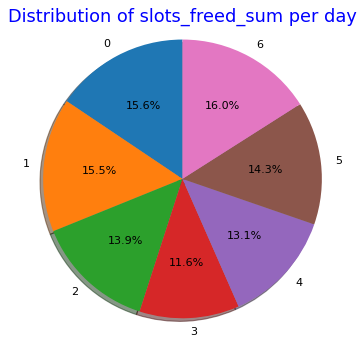

In [109]:
df2 = Adf1.groupby(['day_of_week'])['slots_freed_sum'].count()
label = ['0','1','2','3','4','5','6']
label

plt.figure(figsize=(5,5),dpi=80)
plt.pie(df2, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 90)
plt.axis('equal')
plt.title('Distribution of slots_freed_sum per day', color='blue', size = 16)
plt.show()

## Bivariate analysis

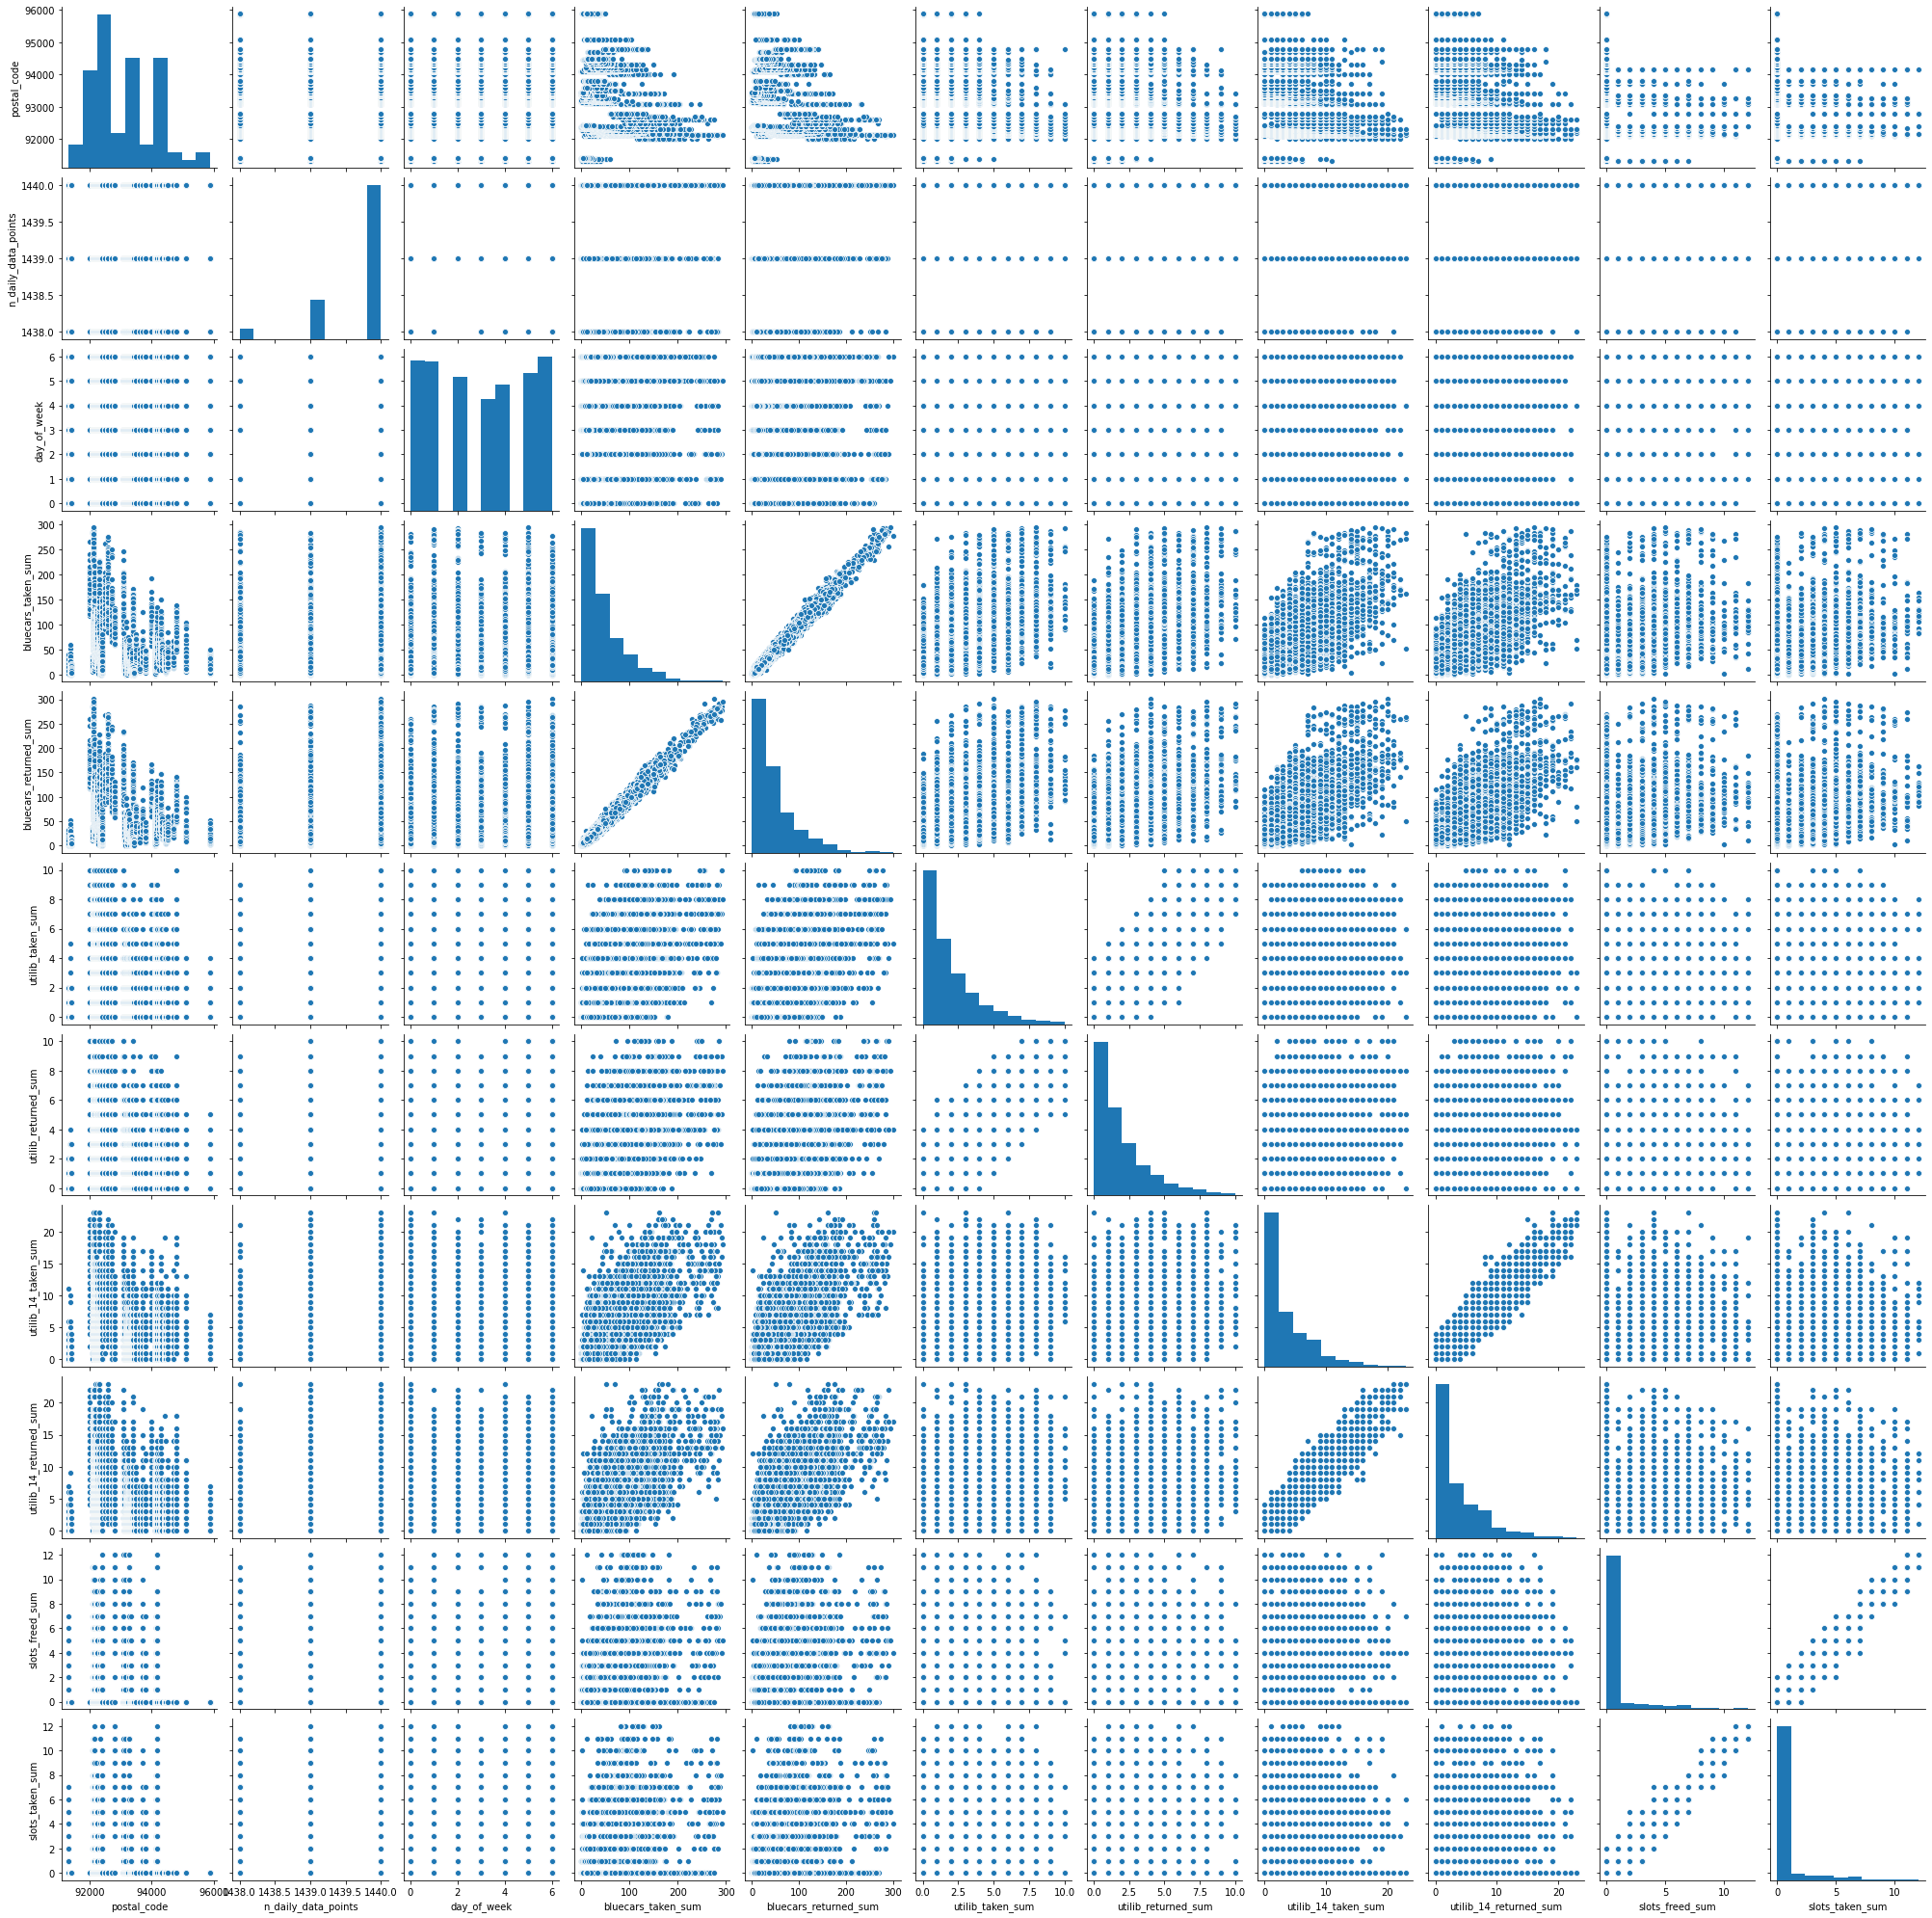

In [110]:
# Using pairplot,we plot the bivariate summaries 
# and recording our observations
#
#
sns.pairplot(Adf1)
plt.show()

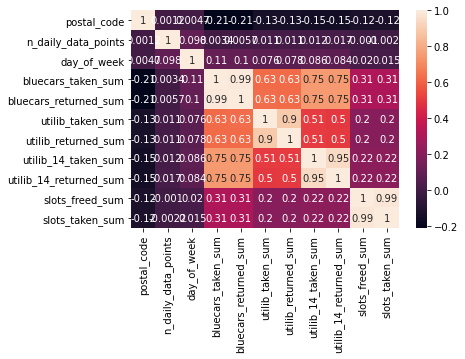

In [111]:
# Using heatmap we plot the correlation
# between various variables
#
sns.heatmap(Adf1.corr(),annot=True)
plt.show()

# Hypothesis testing 

In [112]:
#check the unique values in each column
Adf1.apply(lambda x : x.nunique())


postal_code                79
date                      130
n_daily_data_points         3
day_of_week                 7
day_type                    2
bluecars_taken_sum        275
bluecars_returned_sum     269
utilib_taken_sum           11
utilib_returned_sum        11
utilib_14_taken_sum        24
utilib_14_returned_sum     24
slots_freed_sum            13
slots_taken_sum            13
dtype: int64

In [113]:
#standardize all the numerical features
num_scaled = scale (Adf1[['n_daily_data_points','day_of_week','bluecars_taken_sum','bluecars_returned_sum','utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum','slots_freed_sum','slots_taken_sum']],copy=False)
#scale takes the difference of each values from the mean and divide by standard deviation
num_scaled

array([[ 0.53375072, -1.43600185, -0.6531736 , ..., -0.91536541,
         1.80143629,  0.71365314],
       [-3.00637354, -0.95403375, -0.84755205, ..., -0.91536541,
        -0.3804265 , -0.3800523 ],
       [-1.23631141, -0.47206566, -0.82595445, ..., -0.91536541,
         0.1650392 ,  0.16680042],
       ...,
       [ 0.53375072,  0.97383864, -0.6531736 , ..., -0.65883339,
        -0.3804265 , -0.3800523 ],
       [ 0.53375072,  1.45580674, -0.35080711, ..., -0.91536541,
        -0.3804265 , -0.3800523 ],
       [ 0.53375072, -1.43600185, -0.82595445, ..., -0.40230137,
        -0.3804265 , -0.3800523 ]])

In [114]:
Adf1.groupby('day_type')['bluecars_taken_sum'].describe()


,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
weekday,6820.0,45.560557,44.590618,0.0,15.0,30.0,61.0,291.0
weekend,2963.0,57.718529,48.991550,0.0,21.0,43.0,82.0,293.0


In [0]:
#create 2 samples one for  weekdays and one for weekends
sample_01 = Adf1[Adf1['day_type'] == 'weekday']
sample_02 = Adf1[Adf1['day_type'] == 'weekend']

In [120]:
#check the shape of both the samples
print(sample_01.shape,sample_02.shape)

(6820, 13) (2963, 13)


In [125]:
#make equal number of records in each sample
sample_01 = sample_01.sample(2963)
print(sample_01.shape,sample_02.shape)

(2963, 13) (2963, 13)


In [126]:
alpha = 0.05
Stats,Pvalue = stats.levene(sample_01['bluecars_taken_sum'],sample_01['bluecars_taken_sum'])
print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
  print(' Variances are same accept null hypothesis ')
else:
  print(' Variances are not same reject not null hypothesis ')

 Test statistics : 0.0 
 Alpha : 0.05 
 P-value : 1.0
 Variances are same accept null hypothesis 


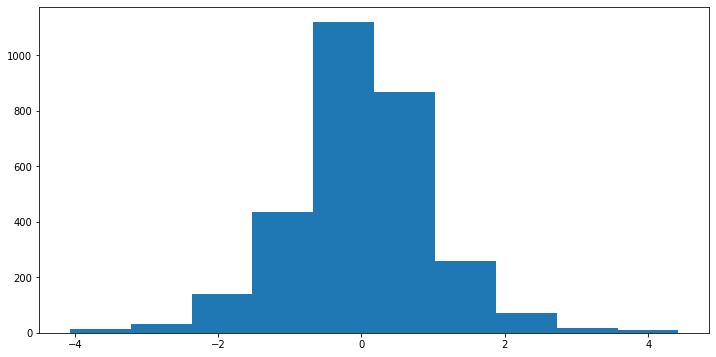

In [127]:
#we will take the difference b/w sample_01 and sample_02 and plot a histogram to check for normality
#we will scale the difference
diff = scale((np.array(sample_01['bluecars_taken_sum']) - np.array(sample_02['bluecars_taken_sum'])))
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()


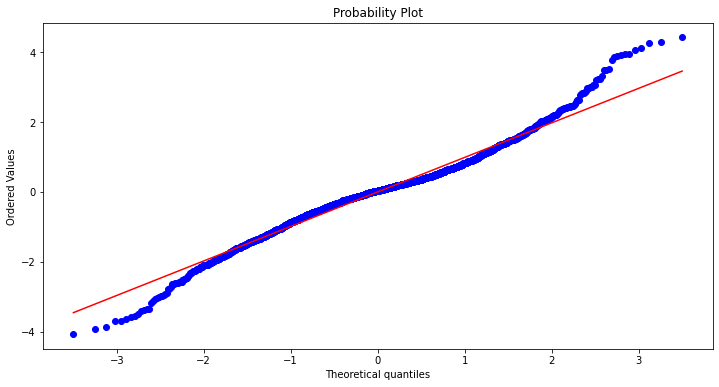

In [128]:
#q-q plot to check the normality
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

In [129]:
alpha = 0.05
statistic,p_value = stats.shapiro(diff)
if p_value > alpha:
  print(f'Accept Null Hypothesis p-value : {p_value}')
else:
  print(f'Reject Null Hypothesis p-value : {p_value}')

Reject Null Hypothesis p-value : 4.1361247011250693e-22


In [131]:
# H0 : There's no difference in demand for bluecars during weekdays and weekends
# H1 : There's a difference in demand for bluecars during weekdays and weekends 
# Alpha : 0.05%
alpha = 0.05
statistic , p_value = stats.ttest_ind(sample_01['bluecars_taken_sum'],sample_02['bluecars_taken_sum'])
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
  print('Reject Null Hypothesis')

Reject Null Hypothesis
